#Data description
The name of my dataset is 'Maternal Health Risk Data.'

There are 1014 rows and 7 columns

The target label is the 'RiskLevel.' The target level is used to predict the risk intensity level during pregnancy that women can face

The variables are mostly numeric, the only variable that is categorical is the 'RiskLevel'



#Proposed analysis

The question that I am trying to answer with my analysis is I am trying to predict the risk intensity level during the pregnancy that women can face. The way that the risk levle would be predicted would be based on the other features.

The kind of ML model that I will be building would be a classification ML model.

Results that I can expect are my model learning how to properly predict the 'RiskLevel' for a pregnant woman based on her other health-related features.(The rest are listed below)

- Classification accuracy that will be able to assess how accurately my model can classify women into the correct risk level category

- Being able to identify which features are most influential in determining the risk level; finding certain medical conditions that are strong indicators of higher risk.

- If my model performs well, achieve a high accuracy in predicting the risk levels, would allow for more informed decisions of the maternal health.

- A possible result to expect can be my model revealing hidden relationships between certain features and the risk level

- Being able to visualize relationships between features and the target label('RiskLevel')

- The overall prediction accuracy of the model.

#Questions that I want to answer

- How does the model's performance vary across different risk level categories?(high, low, medium)
- Which features are the strongest predictors of risk level?
- Is there an interaction effect between certain features on the risk level?(An example would be if the effect on age on risk differ based on blood pressure levles).
- Can I interpret the model's prediction in a way that is understandable to others and more specifcally healthcare providers?
- Can I identify specific reasons why the model predicted a certain risk level for particular patients?
- Are there any consequences of false positives and false negatives?
- Are there any unexpected relations revealed by the model?

#The code outline, histograms, and bar graphs

In [2]:
import io
from google.colab import files
from sklearn import tree
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.model_selection import cross_val_score, KFold,train_test_split

from sklearn.metrics import accuracy_score


In [3]:
uploaded = files.upload()

Saving maternalRisk.csv to maternalRisk.csv


In [4]:
uploaded = io.BytesIO(uploaded['maternalRisk.csv'])

In [5]:
import pandas as pd
df = pd.read_csv(uploaded)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
df.shape

(1014, 7)

In [7]:
df.dtypes

,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


In [8]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Count is the number of non-null values in each column

Mean is the average value of each column

STD is the standard deviation, which is measuring the spread of the data

Min is the minimum value in each column

25% representing the value below which 25% of the data falls

50% is also the median and value below which 50% of the data falls

75% represents the value below which 75% of the data falls

Max is the maximum value in each column

In [9]:
df.describe().count()

,0
Age,8
SystolicBP,8
DiastolicBP,8
BS,8
BodyTemp,8
HeartRate,8


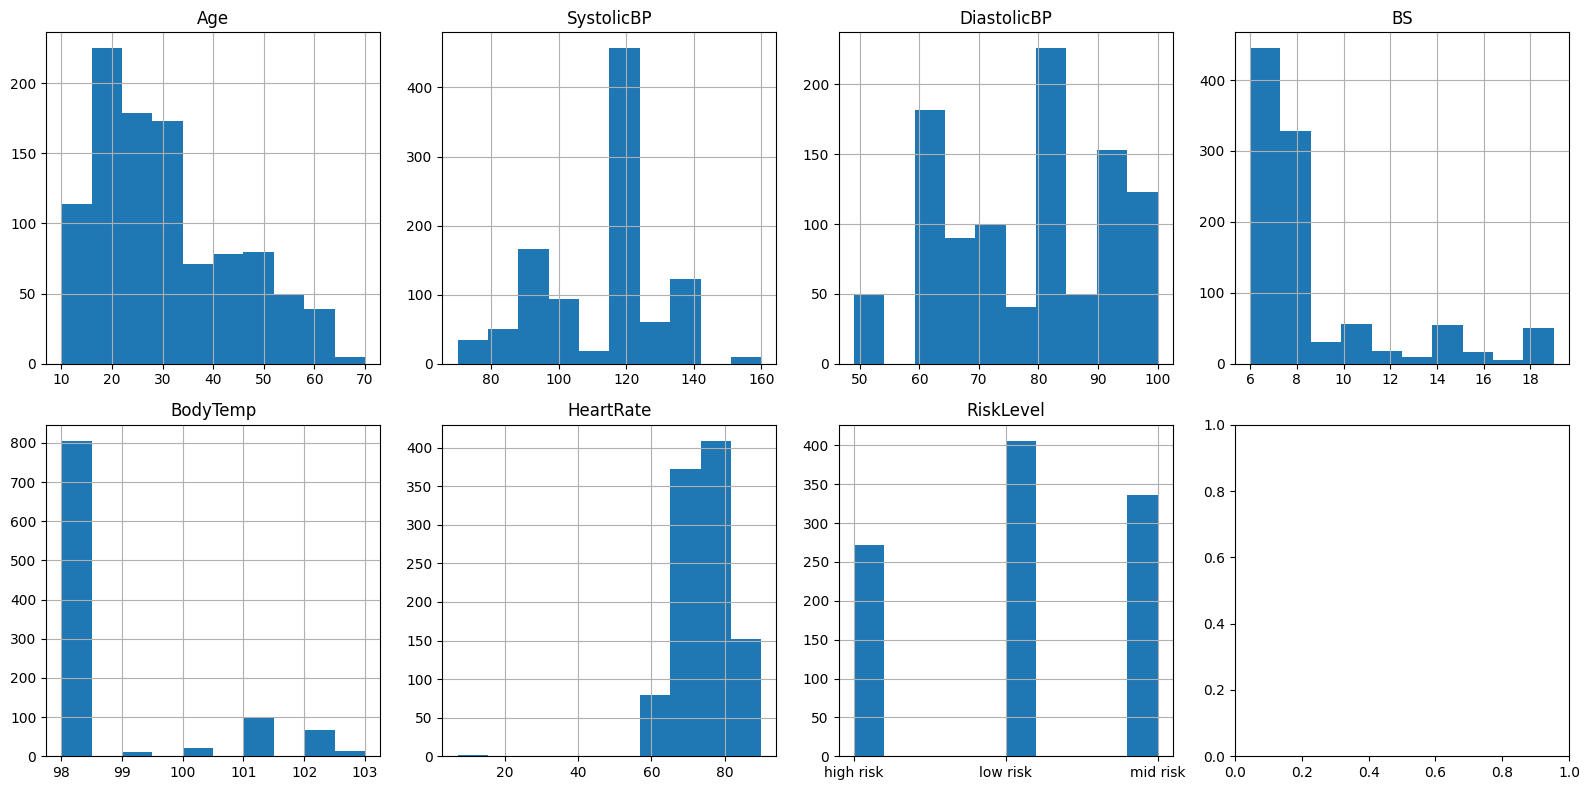

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

# Iterate through the columns and create histograms
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


 Age:
  - Normally distributed with a slight skew towards the younger ages.
  - Most of the women are between 20 and 35 years old.

SystolicBP:
  - Roughly normally distributed with a possible slight skew.
  - Majority of the values seem to be between 80 and 130.

DiastolicBP:
  - Similar distribution as SystolicBP, mostly concentrated between 60 and 100.

BS:
  - Seems to be skewed to the lower values and might have a positive skew.
  - The majority of values seem to be between 70 and 90.

BodyTemp:
  - Shows a normal distribution or a slightly skewed distribution with the majority of the values in the normal temperature range.

HeartRate:
  - Distribution appears to be skewed and concentrated around the normal heart rate range.

RiskLevel:
  - This histogram should show the frequency of different risk levels (high, low, medium)
  - It indicates the proportion of women in each risk category, which is essential to understand the overall risk distribution.

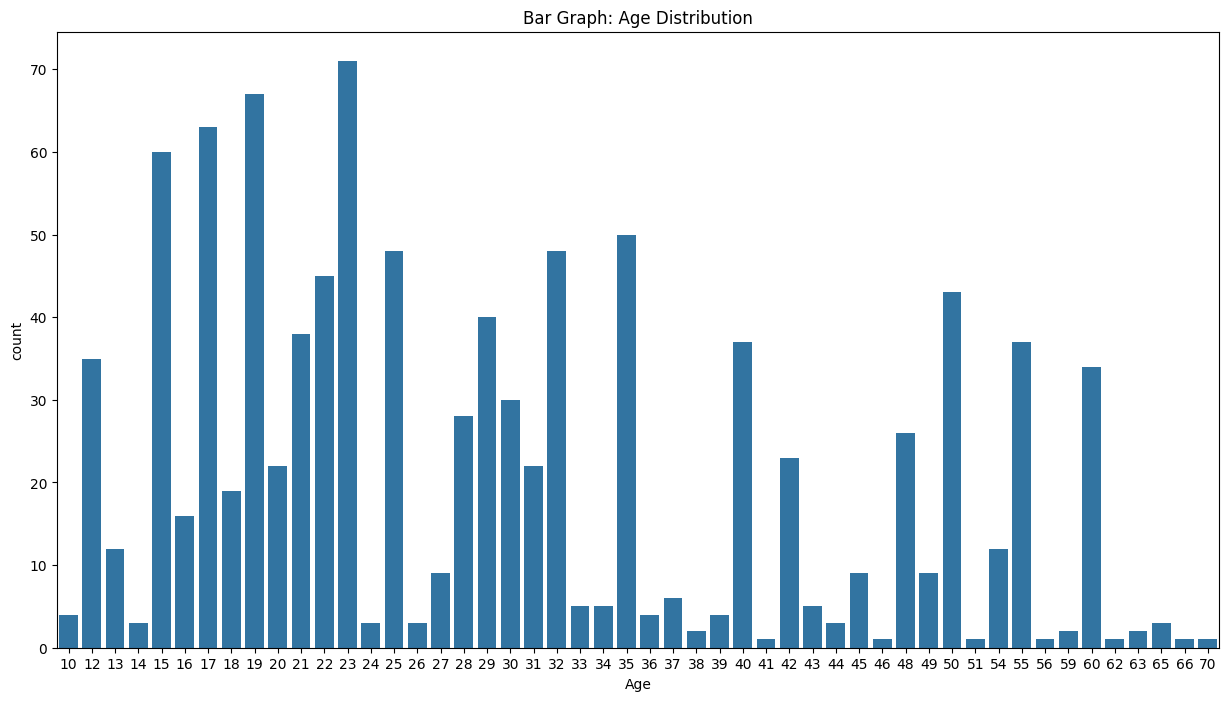

In [11]:
# Bar graph: Class Name distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.countplot(x='Age', data=df)
plt.title('Bar Graph: Age Distribution')
plt.show()

The X-axis represents different age ranges, the Y-axis represents the count of individuals falling within each age range, and the bars represent the height of each bar corresponding to the number of women in that particular age group.

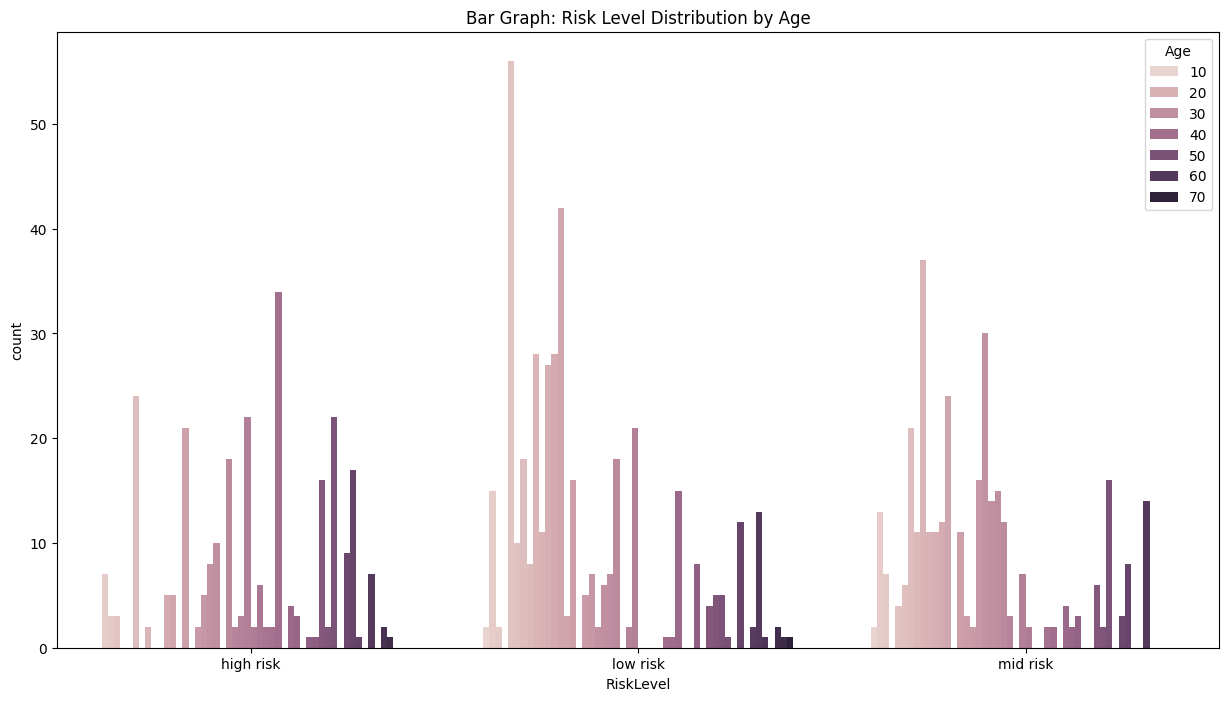

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='Age', data=df)
plt.title('Bar Graph: Risk Level Distribution by Age')
plt.show()

This graph is demonstrating which age groups have a higher prevelance of low, medium, or high-risk levels

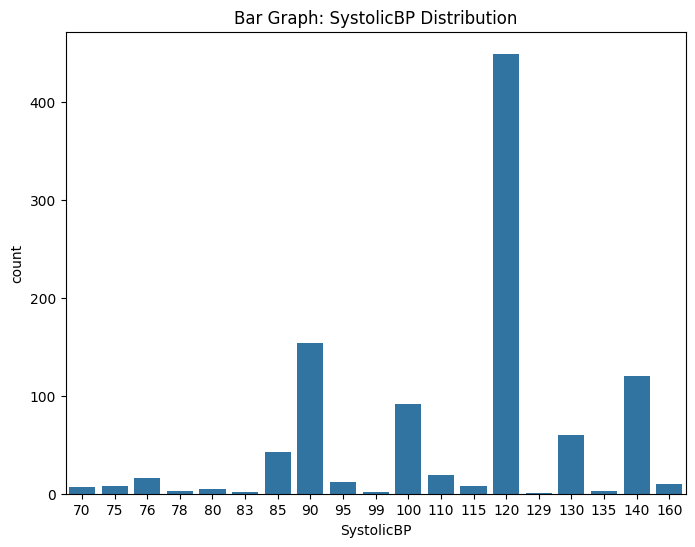

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='SystolicBP', data=df)
plt.title('Bar Graph: SystolicBP Distribution')
plt.show()

X-axis represents the different values of SystolicBP

Y-axis represents the instances of the pregnant women that have the specific SystolicBP value

Bar Graph height represents the height of each bar that corresponds to the number of individuals in the dataset that have the specific SystolicBP

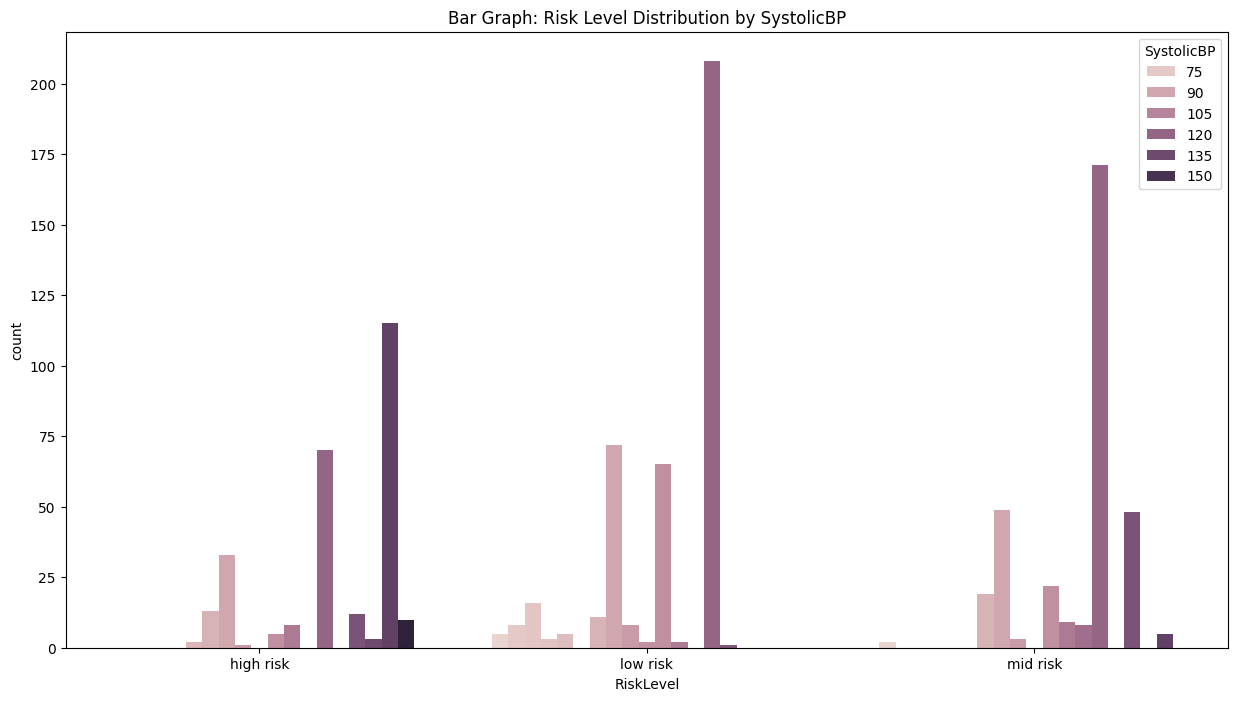

In [21]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='SystolicBP', data=df)
plt.title('Bar Graph: Risk Level Distribution by SystolicBP')
plt.show()

Representing the relationship that the SystolicBP and the pregnancy risk levles have; which SystolicBP values are more frequently associated with a particular risk level.

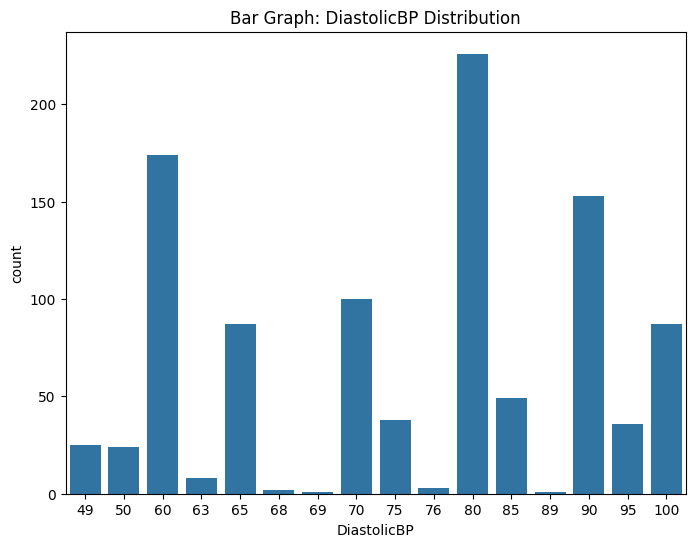

In [14]:
# Bar graph: Class Name distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='DiastolicBP', data=df)
plt.title('Bar Graph: DiastolicBP Distribution')
plt.show()

X-axis represents the different values of DiastolicBP

Y-axis represents the count of individuals who that the specific DiastolicBP value

Bar graph height represents the number of women who have the specific DiastolicBP

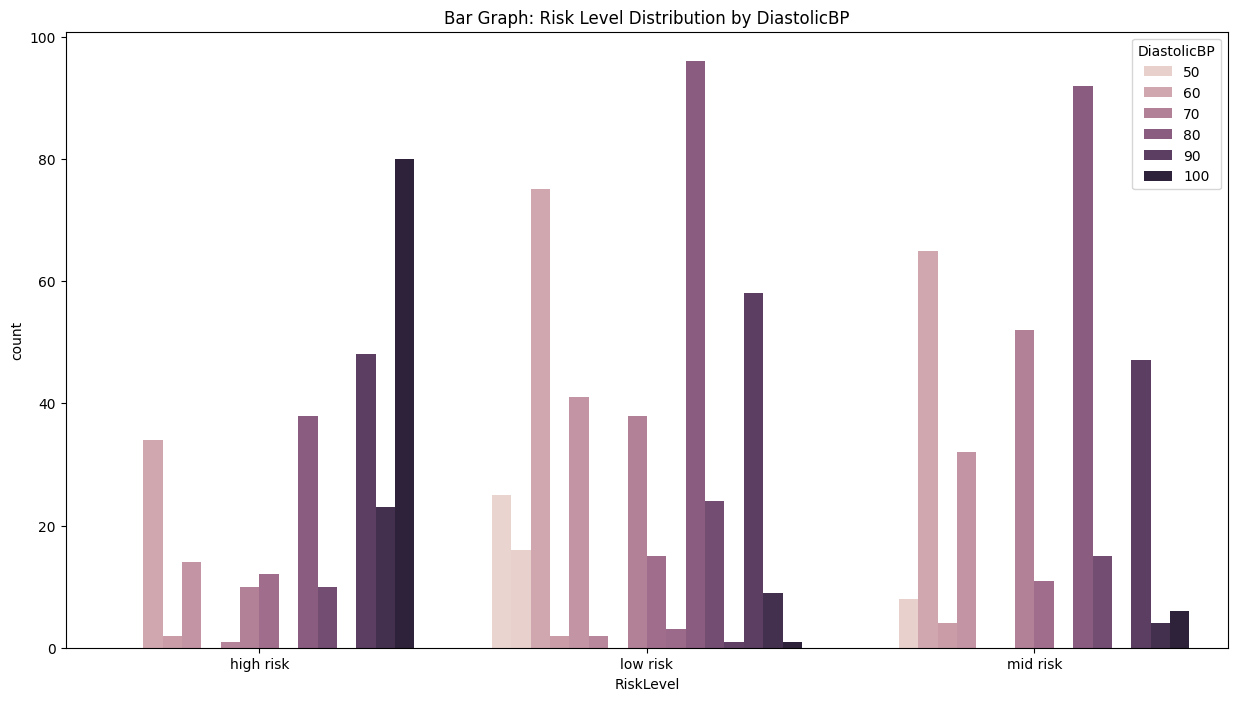

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='DiastolicBP', data=df)
plt.title('Bar Graph: Risk Level Distribution by DiastolicBP')
plt.show()

Representing the different levles of DiastolicBP that are associated with low, medium, or high pregnancy risk.

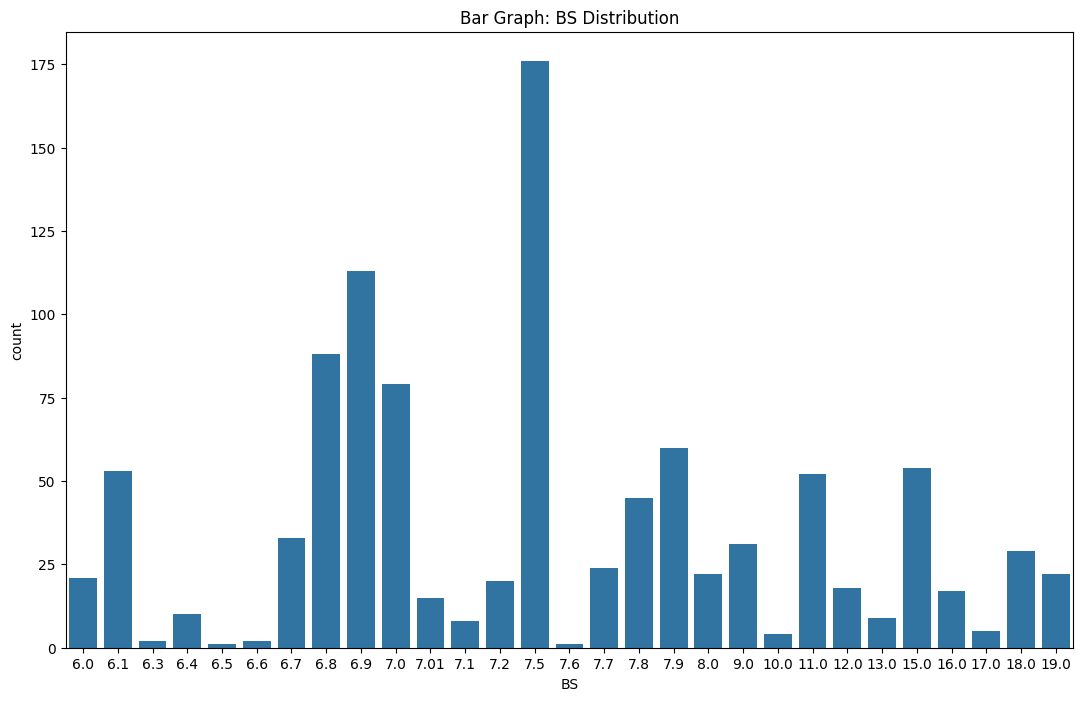

In [15]:
# Bar graph: Class Name distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 8))
sns.countplot(x='BS', data=df)
plt.title('Bar Graph: BS Distribution')
plt.show()

X axis represents the different blood suger values

Y axis represents the count of women in the dataset that have a particualr blood suger value

Bar graph Height represents the number of women in the dataset that have the BS levle corresponding to the specific bar

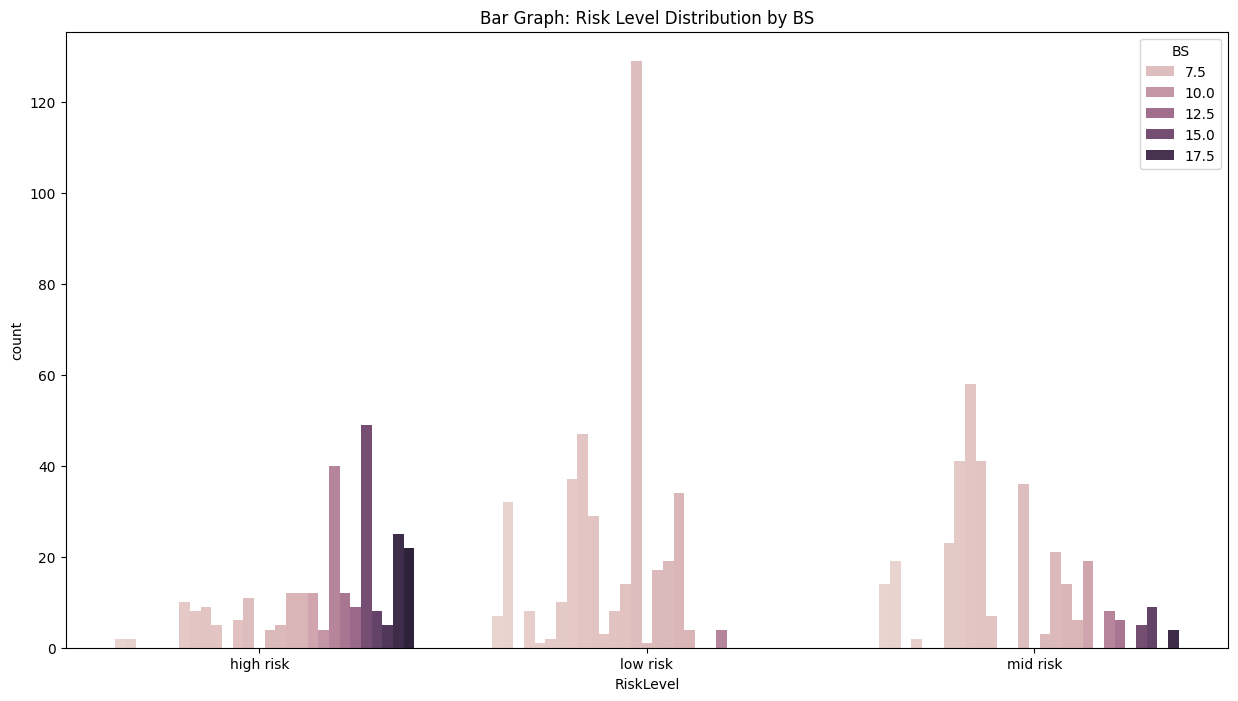

In [23]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='BS', data=df)
plt.title('Bar Graph: Risk Level Distribution by BS')
plt.show()

Representing the blood sugar levles within each risk category

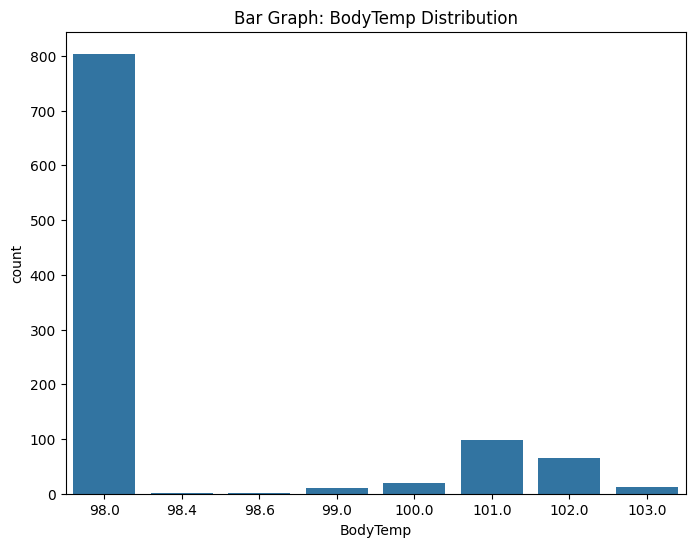

In [16]:
# Bar graph: Class Name distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='BodyTemp', data=df)
plt.title('Bar Graph: BodyTemp Distribution')
plt.show()

X axis represents the different values of body temperatures

Y axis represents the count of pregnant women who have the particular body temperature

Bar height represents the number of pregnant women who have the body temperature corresponding to the specific bar

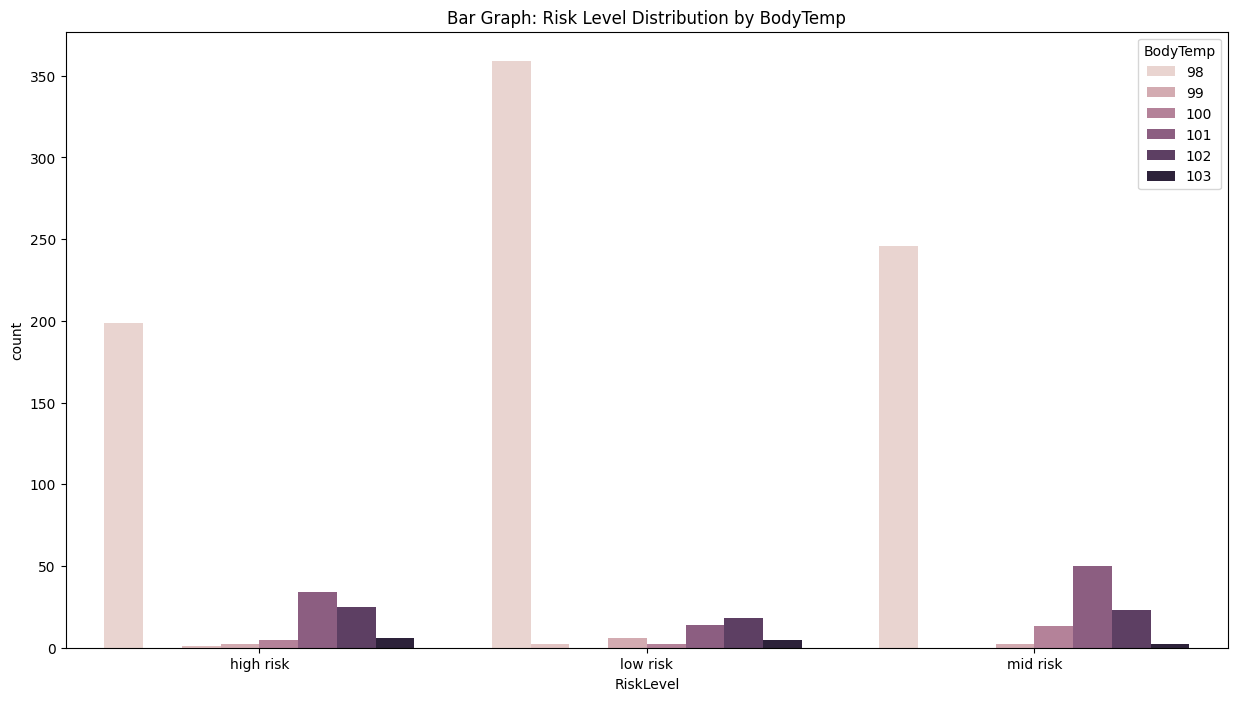

In [24]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='BodyTemp', data=df)
plt.title('Bar Graph: Risk Level Distribution by BodyTemp')
plt.show()

Representing how many women with a specific body temperature fall into each risk levl category

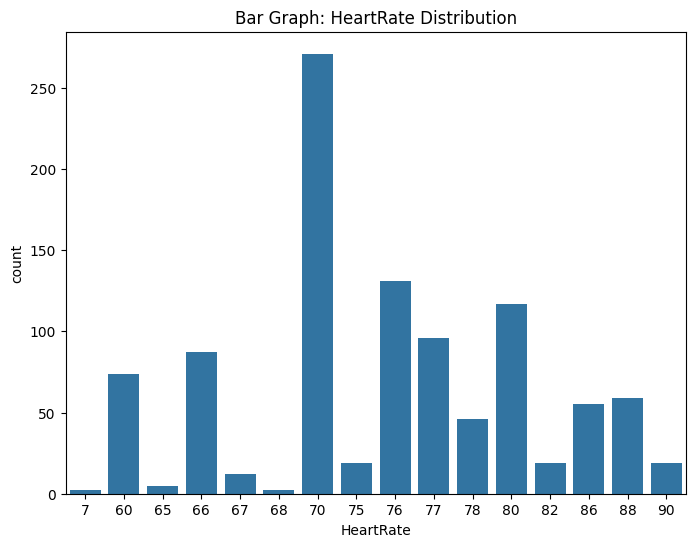

In [17]:
# Bar graph: Class Name distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartRate', data=df)
plt.title('Bar Graph: HeartRate Distribution')
plt.show()

X axis represents the different values of heart rate

Y axis represnts the count of how many times a specific heart rate values appears in the dataset

Bar graph height represents how the height of the bar corresponds to the count of women who have the heart rate represented by the bar

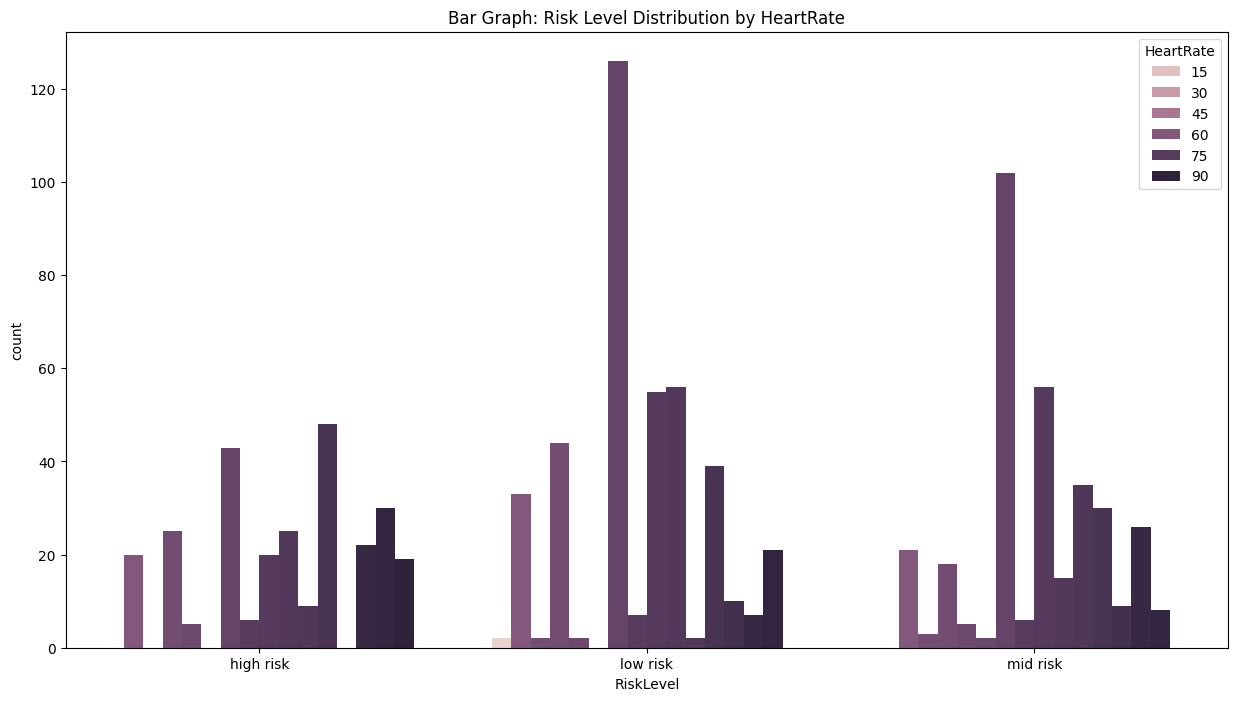

In [25]:
plt.figure(figsize=(15, 8))
sns.countplot(x='RiskLevel', hue='HeartRate', data=df)
plt.title('Bar Graph: Risk Level Distribution by HeartRate')
plt.show()

Representing which heart rate ranges are commonly associated with each risk level